# Training using Extracting Edges from images

## Loading Packages

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

## Loading Dataset

In [2]:
# Path to the dataset folder
dataset_path = "E:/Master Thesis Materials/Dataset/generating_datasets"

## Getting No. of Classes in Dataset

In [3]:
# Get the list of classes (folder names)
classes = os.listdir(dataset_path)
num_classes = len(classes)
print(num_classes)

36


## Data Pre-Processing (Extracting Edges)

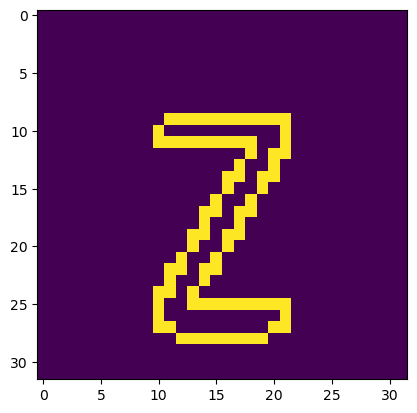

In [4]:
# Load the dataset
images = []
labels = []
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.Canny(img, 200, 250)  # Get the edges of the image
        plt.imshow(img)
        img = cv2.resize(img, (32, 32))  # Resize the image to 28x28
        images.append(img)
        labels.append(i)

## Convert images and labels to numpy arrays


In [5]:
# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

## Splitting Dataset

In [6]:
# Split the dataset into train, test, and validation sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Image Normalization

In [7]:
# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0


## One-hot-Encoding

In [8]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

## Defining FCN Model 

In [9]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
# Train the model
checkpoint = ModelCheckpoint("edged_model-50epochs.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(x_train.reshape(-1, 32, 32, 1), y_train, batch_size=64, epochs=50, validation_data=(x_val.reshape(-1, 32, 32, 1), y_val), callbacks=callbacks_list)


Epoch 1/40
518/518 [==============================] - ETA: 0s - loss: 0.7315 - accuracy: 0.8005
Epoch 1: val_accuracy improved from -inf to 0.94223, saving model to edged_model-50epochs.h5
518/518 [==============================] - 126s 227ms/step - loss: 0.7315 - accuracy: 0.8005 - val_loss: 0.2079 - val_accuracy: 0.9422
Epoch 2/40
517/518 [============================>.] - ETA: 0s - loss: 0.2890 - accuracy: 0.9154
Epoch 2: val_accuracy improved from 0.94223 to 0.95347, saving model to edged_model-50epochs.h5
518/518 [==============================] - 116s 224ms/step - loss: 0.2890 - accuracy: 0.9154 - val_loss: 0.1563 - val_accuracy: 0.9535
Epoch 3/40
518/518 [==============================] - ETA: 0s - loss: 0.2241 - accuracy: 0.9319
Epoch 3: val_accuracy improved from 0.95347 to 0.96132, saving model to edged_model-50epochs.h5
518/518 [==============================] - 130s 252ms/step - loss: 0.2241 - accuracy: 0.9319 - val_loss: 0.1355 - val_accuracy: 0.9613
Epoch 4/40
517/518 [==

In [13]:
# Evaluate the model
score = model.evaluate(x_test.reshape(-1, 32, 32, 1), y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11216209083795547
Test accuracy: 0.9779539704322815


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(x_val.reshape(-1, 32, 32, 1))

# Convert one-hot encoded labels to integer labels
y_true = np.argmax(y_val, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

518/518 [==============================] - 18s 15ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       906
           1       0.98      0.98      0.98       689
           2       1.00      1.00      1.00       672
           3       1.00      1.00      1.00       679
           4       0.99      1.00      0.99       685
           5       0.99      1.00      0.99       679
           6       0.99      1.00      0.99       687
           7       0.99      0.99      0.99       644
           8       0.99      1.00      0.99       687
           9       0.98      1.00      0.99       671
          10       0.99      0.98      0.98       360
          11       0.97      0.98      0.97       350
          12       0.98      0.98      0.98       367
          13       0.99      0.99      0.99       404
          14       0.97      0.98      0.97       362
          15       0.98      0.97      0.98       346
          16       0.99 

518/518 [==============================] - 8s 15ms/step


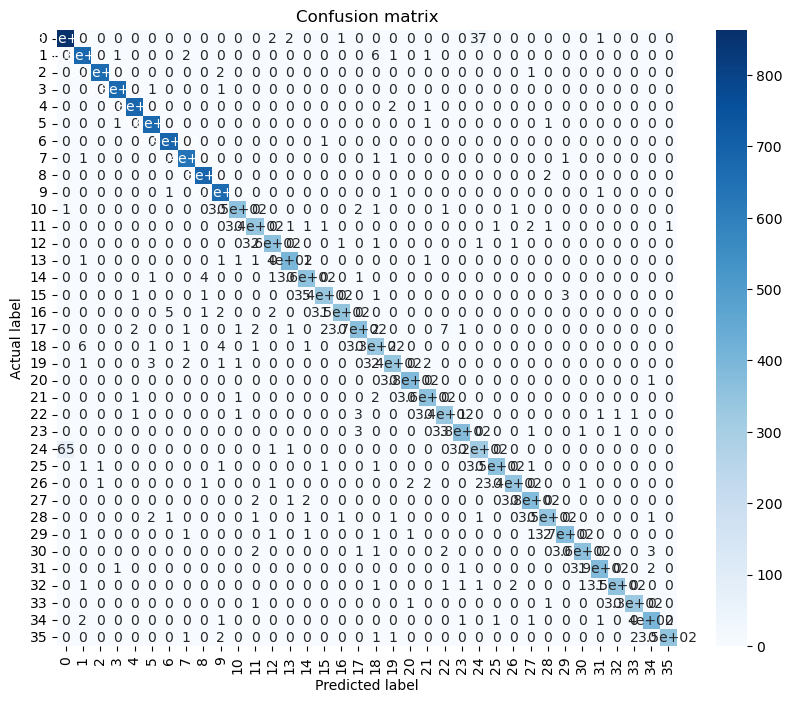

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicted and actual labels
y_pred = model.predict(x_val.reshape(-1, 32, 32, 1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

518/518 [==============================] - 8s 15ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       906
           1       0.98      0.98      0.98       689
           2       1.00      1.00      1.00       672
           3       1.00      1.00      1.00       679
           4       0.99      1.00      0.99       685
           5       0.99      1.00      0.99       679
           6       0.99      1.00      0.99       687
           7       0.99      0.99      0.99       644
           8       0.99      1.00      0.99       687
           9       0.98      1.00      0.99       671
          10       0.99      0.98      0.98       360
          11       0.97      0.98      0.97       350
          12       0.98      0.98      0.98       367
          13       0.99      0.99      0.99       404
          14       0.97      0.98      0.97       362
          15       0.98      0.97      0.98       346
          16       0.99  

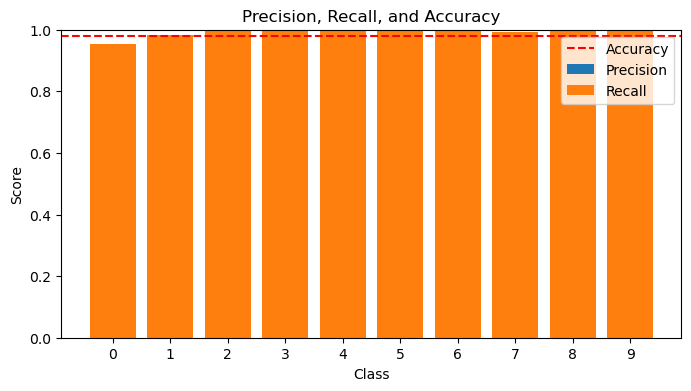

In [16]:
# Evaluate the model on the test set
y_pred = model.predict(x_val.reshape(-1, 32, 32, 1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

# Plot the precision, recall, and accuracy
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
precision = [report[str(i)]['precision'] for i in range(10)]
recall = [report[str(i)]['recall'] for i in range(10)]
accuracy = report['accuracy']
labels = [str(i) for i in range(10)]

plt.figure(figsize=(8, 4))
plt.bar(labels, precision, label='Precision')
plt.bar(labels, recall, label='Recall')
plt.axhline(y=accuracy, color='r', linestyle='--', label='Accuracy')
plt.title('Precision, Recall, and Accuracy')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.legend()
plt.show()

518/518 [==============================] - 8s 16ms/step
Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3418
           1       1.00      1.00      1.00      2760
           2       1.00      1.00      1.00      2769
           3       1.00      1.00      1.00      2799
           4       1.00      1.00      1.00      2763
           5       1.00      1.00      1.00      2787
           6       1.00      1.00      1.00      2735
           7       1.00      1.00      1.00      2805
           8       1.00      1.00      1.00      2760
           9       1.00      1.00      1.00      2730
          10       1.00      1.00      1.00      1483
          11       1.00      1.00      1.00      1464
          12       1.00      1.00      1.00      1440
          13       1.00      1.00      1.00      1426
          14       1.00      1.00      1.00      1448
          15       1.00      1.00      1.00   

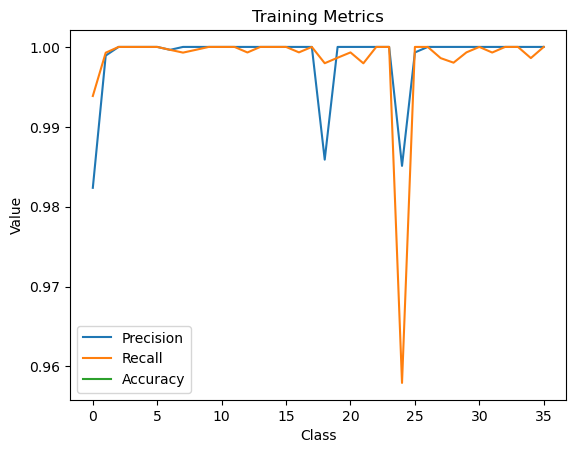

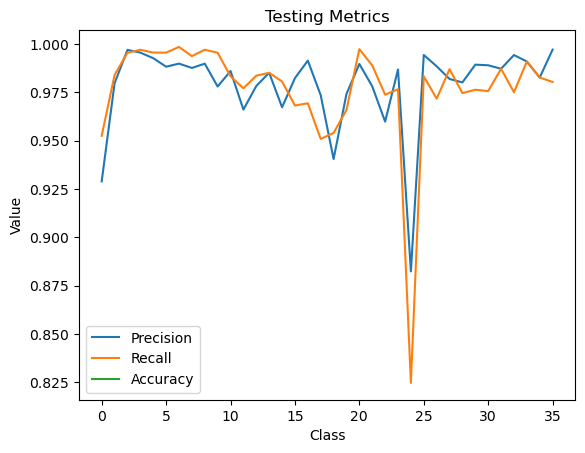

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# evaluate the model on the training dataset
train_loss, train_acc = model.evaluate(x_train.reshape(-1, 32, 32, 1), y_train, verbose=0)

# get predictions for training dataset
y_train_pred = model.predict(x_train.reshape(-1, 32, 32, 1))
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(x_val.reshape(-1, 32, 32, 1), y_val, verbose=0)

# get predictions for testing dataset
y_test_pred = model.predict(x_val.reshape(-1, 32, 32, 1))
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# get classification report for training dataset
train_report = classification_report(np.argmax(y_train, axis=1), y_train_pred_classes)
print("Training Classification Report:\n", train_report)

# get classification report for testing dataset
test_report = classification_report(np.argmax(y_val, axis=1), y_test_pred_classes)
print("Testing Classification Report:\n", test_report)

# get confusion matrix for training dataset
train_matrix = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred_classes)
print("Training Confusion Matrix:\n", train_matrix)

# get confusion matrix for testing dataset
test_matrix = confusion_matrix(np.argmax(y_val, axis=1), y_test_pred_classes)
print("Testing Confusion Matrix:\n", test_matrix)

# calculate precision, recall, and accuracy for training dataset
train_precision = np.diag(train_matrix) / np.sum(train_matrix, axis=0)
train_recall = np.diag(train_matrix) / np.sum(train_matrix, axis=1)
train_accuracy = np.sum(np.diag(train_matrix)) / np.sum(train_matrix)

# calculate precision, recall, and accuracy for testing dataset
test_precision = np.diag(test_matrix) / np.sum(test_matrix, axis=0)
test_recall = np.diag(test_matrix) / np.sum(test_matrix, axis=1)
test_accuracy = np.sum(np.diag(test_matrix)) / np.sum(test_matrix)

# plot the precision, recall, and accuracy for training dataset
plt.plot(train_precision, label='Precision')
plt.plot(train_recall, label='Recall')
plt.plot(train_accuracy, label='Accuracy')
plt.legend()
plt.title('Training Metrics')
plt.xlabel('Class')
plt.ylabel('Value')
plt.show()

# plot the precision, recall, and accuracy for testing dataset
plt.plot(test_precision, label='Precision')
plt.plot(test_recall, label='Recall')
plt.plot(test_accuracy, label='Accuracy')
plt.legend()
plt.title('Testing Metrics')
plt.xlabel('Class')
plt.ylabel('Value')
plt.show()

2069/2069 [==============================] - 31s 15ms/step


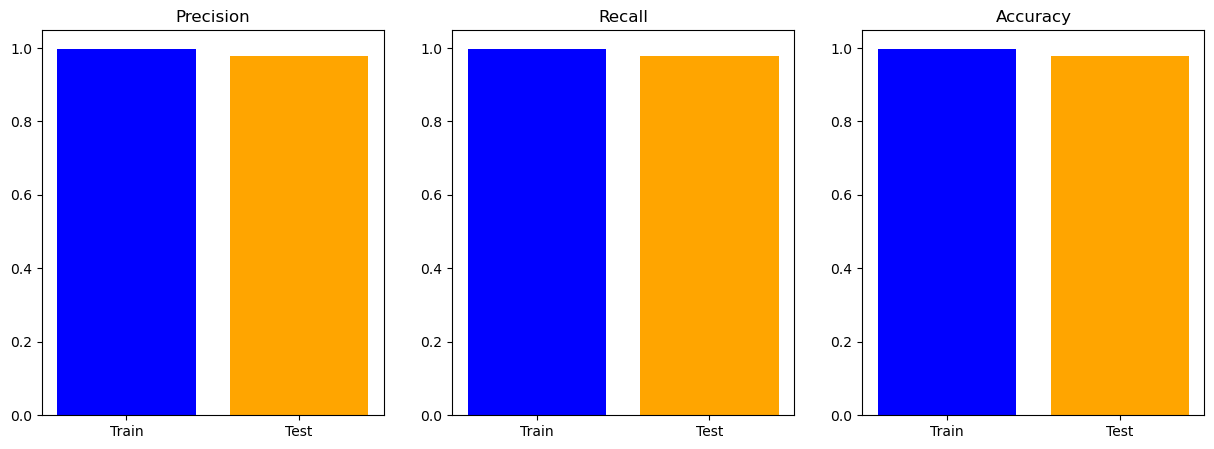

In [18]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Make predictions on the testing dataset
y_pred = model.predict(x_val.reshape(-1, 32, 32, 1))

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_val, axis=1)
y_train_labels = np.argmax(y_train, axis=1)

# Calculate precision, recall, and accuracy for the training dataset
train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(y_train_labels, np.argmax(model.predict(x_train.reshape(-1, 32, 32, 1)), axis=1), average='weighted')
train_accuracy = accuracy_score(y_train_labels, np.argmax(model.predict(x_train.reshape(-1, 32, 32, 1)), axis=1))

# Calculate precision, recall, and accuracy for the testing dataset
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test_labels, y_pred_labels, average='weighted')
test_accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Plot precision, recall, and accuracy scores for both the training and testing dataset
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(['Train', 'Test'], [train_precision, test_precision], color=['blue', 'orange'])
axs[0].set_title('Precision')
axs[1].bar(['Train', 'Test'], [train_recall, test_recall], color=['blue', 'orange'])
axs[1].set_title('Recall')
axs[2].bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
axs[2].set_title('Accuracy')
plt.show()


518/518 [==============================] - 8s 15ms/step


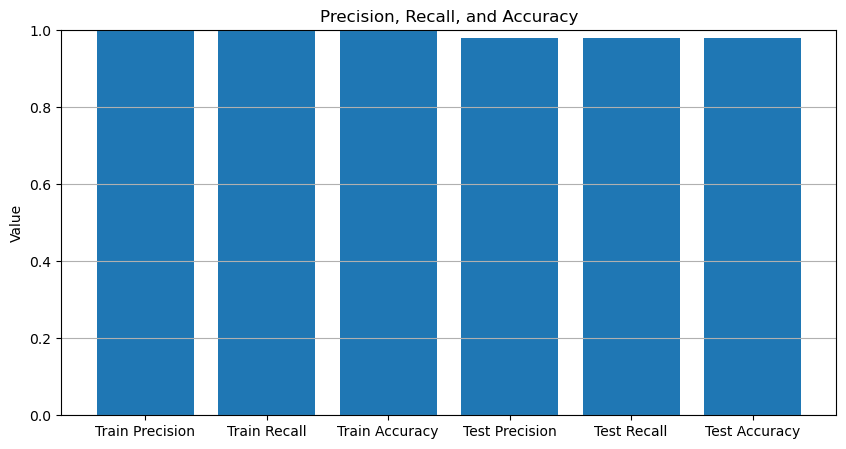

In [19]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Evaluate model on training data
train_pred = model.predict(x_train.reshape(-1, 32, 32, 1))
train_pred_classes = np.argmax(train_pred, axis=1)
train_true_classes = np.argmax(y_train, axis=1)
train_cm = confusion_matrix(train_true_classes, train_pred_classes)
train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(train_true_classes, train_pred_classes, average='weighted')
train_accuracy = np.sum(train_pred_classes == train_true_classes) / len(train_true_classes)

# Evaluate model on testing data
test_pred = model.predict(x_val.reshape(-1, 32, 32, 1))
test_pred_classes = np.argmax(test_pred, axis=1)
test_true_classes = np.argmax(y_val, axis=1)
test_cm = confusion_matrix(test_true_classes, test_pred_classes)
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(test_true_classes, test_pred_classes, average='weighted')
test_accuracy = np.sum(test_pred_classes == test_true_classes) / len(test_true_classes)

# Plot precision, recall, and accuracy
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(['Train Precision', 'Train Recall', 'Train Accuracy', 'Test Precision', 'Test Recall', 'Test Accuracy'],
       [train_precision, train_recall, train_accuracy, test_precision, test_recall, test_accuracy])
ax.set_ylim(0, 1)
ax.set_title('Precision, Recall, and Accuracy')
ax.set_ylabel('Value')
ax.grid(axis='y')
plt.show()


## Character Error Rate

In [1]:
import cv2
import numpy as np
from tensorflow import keras
import editdistance

# Function to load tire images
def load_tire_images(tire_dir):
    tire_images = []
    for filename in os.listdir(tire_dir):
        img = cv2.imread(os.path.join(tire_dir,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            tire_images.append(img)
    return tire_images

# Load test tire images
test_tire_dir = 'Test Tire images'
test_tire_images = load_tire_images(test_tire_dir)

# Load the pretrained OCR sequence model
model = keras.models.load_model('edged_model.h5')

# Define the vocabulary of characters the model can recognize
vocab = "0123456789abcdefghijklmnopqrstuvwxyz"

# Define the function to preprocess the test images
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = np.expand_dims(img, axis=-1)
    img = img.astype('float32') / 255.
    return img

# Define the function to predict the labels for the test images
def predict_labels(test_images):
    preds = model.predict(test_images)
    predicted_labels = []
    for pred in preds:
        label = ''.join([vocab[i] for i in np.argmax(pred, axis=1)])
        predicted_labels.append(label)
    return predicted_labels

# Preprocess the test images and predict their labels
test_images_processed = [preprocess_image(img_path) for img_path in test_images]
predicted_labels = predict_labels(test_images_processed)

# Calculate the character-level accuracy
total_chars = 0
correct_chars = 0
for i in range(len(test_labels)):
    total_chars += len(test_labels[i])
    correct_chars += sum([1 for j in range(len(test_labels[i])) if test_labels[i][j] == predicted_labels[i][j]])
char_acc = correct_chars / total_chars

# Calculate the word-level accuracy
total_words = len(test_labels)
correct_words = sum([1 for i in range(len(test_labels)) if test_labels[i] == predicted_labels[i]])
word_acc = correct_words / total_words

# Calculate the edit distance
total_distance = 0
for i in range(len(test_labels)):
    distance = editdistance.eval(test_labels[i], predicted_labels[i])
    total_distance += distance
edit_distance = total_distance / len(test_labels)

# Calculate the confidence score
total_confidence = 0
for i in range(len(test_labels)):
    confidence = np.mean(np.max(model.predict(np.expand_dims(test_images_processed[i], axis=0)), axis=1))
    total_confidence += confidence
confidence_score = total_confidence / len(test_labels)

# Print the evaluation metrics
print('Character-Level Accuracy:', char_acc)
print('Word-Level Accuracy:', word_acc)
print('Edit Distance:', edit_distance)
print('Confidence Score:', confidence_score)


Character-level accuracy: 0.06666666666666667
Edit distance: 26


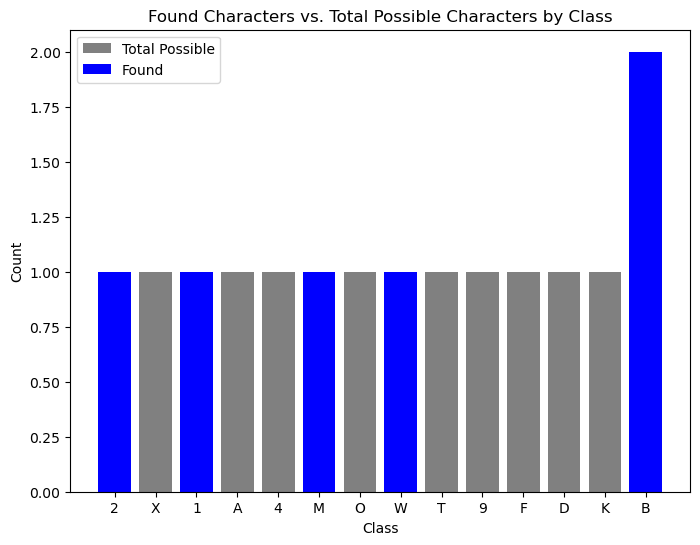

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#loading test tire image
test_images = ['test tire 1(1).jpeg']

# Assuming you have a list of ground truth labels for each tire image
ground_truth_labels = ["DOT", "AFXK", "WBBM", "2419"]

# Assuming you have a list of predicted labels from your sequential model
predicted_labels = ["ABB", "WBMD", "WBBM", "21BR"]

# Define a function to calculate the count of found characters for each class
def calculate_character_counts(ground_truth, predicted):
    # Initialize a dictionary to store the character counts for each class
    character_counts = {}

    # Iterate through each ground truth and predicted label pair
    for true_label, pred_label in zip(ground_truth, predicted):
        # Iterate through each character in the ground truth label
        for character in true_label:
            # Check if the character exists in the predicted label
            if character in pred_label:
                # Increment the count for the respective class in the dictionary
                character_counts[character] = character_counts.get(character, 0) + 1

    return character_counts

# Calculate the character counts
counts = calculate_character_counts(ground_truth_labels, predicted_labels)

# Get the unique characters from the ground truth labels
unique_characters = list(set("".join(ground_truth_labels)))

# Calculate the count of all possible characters
possible_character_counts = [len([1 for label in ground_truth_labels if char in label]) for char in unique_characters]

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(range(len(unique_characters)), possible_character_counts, color='gray', label='Total Possible')
plt.bar(range(len(unique_characters)), [counts.get(char, 0) for char in unique_characters], color='blue', label='Found')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(unique_characters)), unique_characters)
plt.legend()
plt.title('Found Characters vs. Total Possible Characters by Class')
plt.show()
